<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Classification_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [99]:
path = 'https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv'
df_student = pd.read_csv(path)
df_student.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [100]:
df_student.columns

Index(['Estado civil', 'Migração', 'Sexo', 'Idade na matrícula', 'Estrangeiro',
       'Necessidades educacionais especiais', 'Devedor',
       'Taxas de matrícula em dia', 'Bolsista', 'Taxa de desemprego',
       'Taxa de inflação', 'PIB', 'Curso', 'Período', 'Qualificação prévia',
       'disciplinas 1º semestre (creditadas)',
       'disciplinas 1º semestre (matriculadas)',
       'disciplinas 1º semestre (avaliações)',
       'disciplinas 1º semestre (aprovadas)',
       'disciplinas 1º semestre (notas)',
       'disciplinas 1º semestre (sem avaliações)',
       'disciplinas 2º semestre (creditadas)',
       'disciplinas 2º semestre (matriculadas)',
       'disciplinas 2º semestre (avaliações)',
       'disciplinas 2º semestre (aprovadas)',
       'disciplinas 2º semestre (notas)',
       'disciplinas 2º semestre (sem avaliações)', 'Target'],
      dtype='object')

In [101]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [102]:
df_student.duplicated().sum()

24

In [103]:
df_student.drop_duplicates(inplace = True)
df_student.duplicated().sum()

0

In [104]:
round(df_student['Estado civil'].value_counts(normalize=True)*100,2)

Solteiro               88.55
Casado                  8.59
Divorciado              2.07
União Estável           0.57
Legalmente Separado     0.14
Viúvo                   0.09
Name: Estado civil, dtype: float64

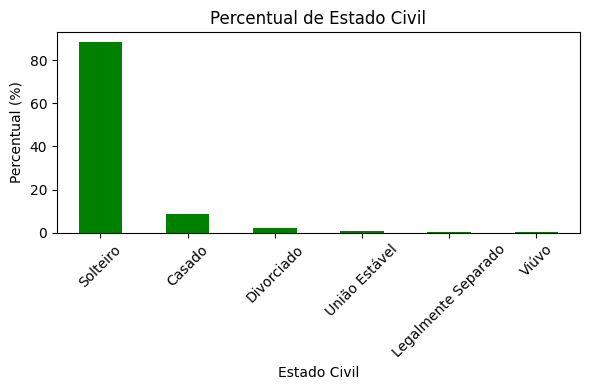

In [105]:
estado_civil_counts = round(df_student['Estado civil'].value_counts(normalize=True) * 100, 2)
plt.figure(figsize=(6, 4))
estado_civil_counts.plot(kind='bar', color='green')
plt.title('Percentual de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

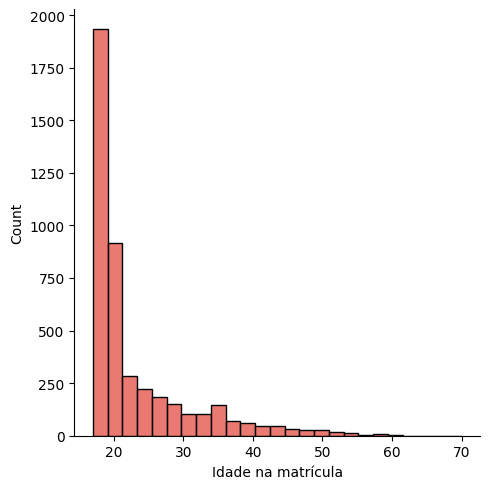

In [106]:
sns.displot(df_student['Idade na matrícula'], bins=25);

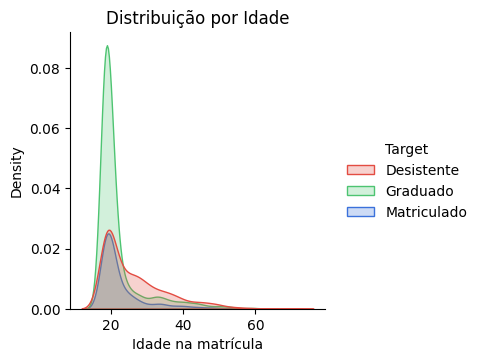

In [107]:
color_dict = {'Desistente':'#e34c42', 'Graduado':'#4dc471', 'Matriculado':'#3b71db'}
sns.set_palette(list(color_dict.values()))
sns.displot(data=df_student, x='Idade na matrícula', hue='Target', kind='kde',
            fill='True', height=3.5)
plt.title('Distribuição por Idade');

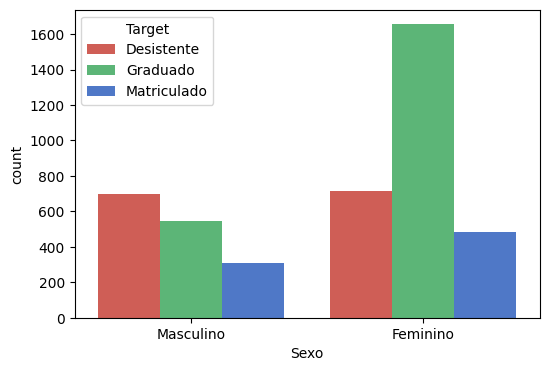

In [108]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_student, x='Sexo', hue='Target');

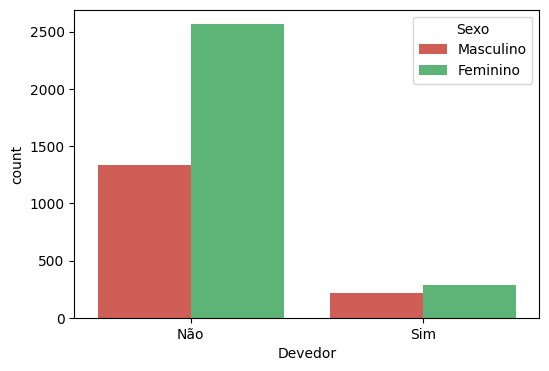

In [109]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_student, x='Devedor', hue='Sexo');

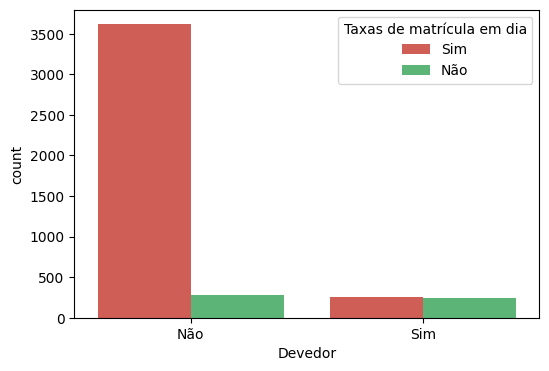

In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_student, x='Devedor', hue='Taxas de matrícula em dia');

<ipython-input-111-8792ba6cd81a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



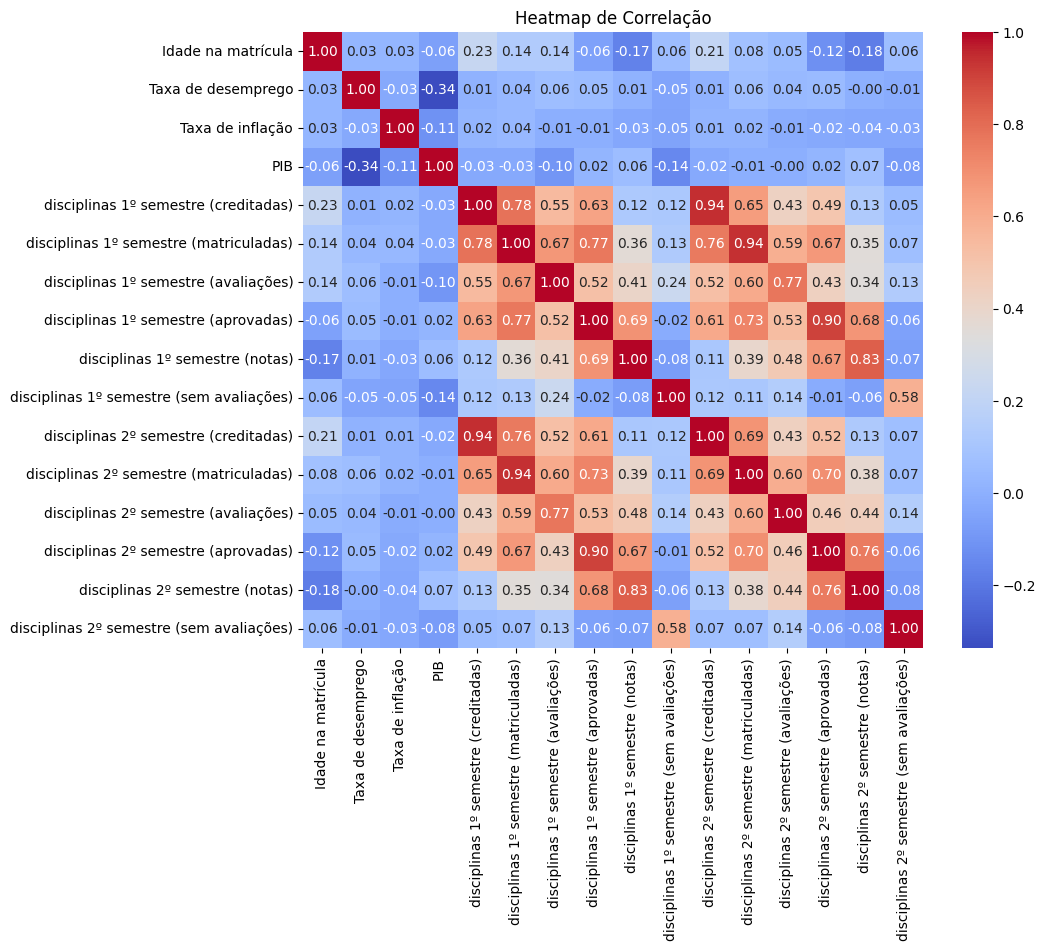

In [111]:
correlation_matrix = df_student.corr()
plt.figure(figsize=(10, 8))  # Define o tamanho do gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

In [112]:
round(df_student.Curso.value_counts(normalize=True)*100,2)

Enfermagem                                    17.39
Gestão                                         8.61
Serviço Social                                 8.07
Enfermagem Veterinária                         7.66
Jornalismo e Comunicação                       7.52
Gestão de Publicidade e Marketing              6.09
Gestão (noturno)                               6.07
Turismo                                        5.73
Design de Comunicação                          5.14
Serviço Social (noturno)                       4.89
Agronomia                                      4.77
Animação e Design Multimídia                   4.43
Educação Básica                                4.34
Engenharia da computação                       3.86
Zootecnia                                      3.20
Odontologia                                    1.95
Tecnologias de Produção de Biocombustíveis     0.27
Name: Curso, dtype: float64

In [113]:
count = df_student.groupby(['Curso', 'Target']).size().reset_index(name='count')
trans = lambda x: (x/x.sum())*100
count['percent'] = count.groupby('Curso')['count'].transform(trans)
fig = px.bar(count, y='Curso', x='percent', color='Target', orientation='h',
             color_discrete_map=color_dict)
fig.show()

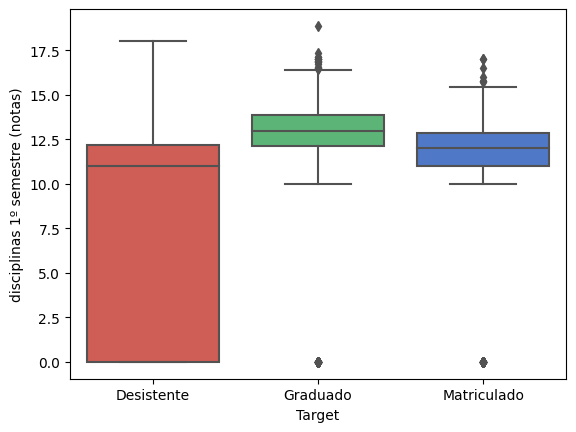

In [114]:
sns.boxplot(data=df_student, x='Target', y='disciplinas 1º semestre (notas)');

In [115]:
round(df_student['Target'].value_counts(normalize=True)*100,2)

Graduado       49.98
Desistente     32.11
Matriculado    17.91
Name: Target, dtype: float64

In [116]:
cat_columns = df_student.select_dtypes(include=['object']).columns.tolist()
cat_columns.pop()
cat_columns

['Estado civil',
 'Migração',
 'Sexo',
 'Estrangeiro',
 'Necessidades educacionais especiais',
 'Devedor',
 'Taxas de matrícula em dia',
 'Bolsista',
 'Curso',
 'Período',
 'Qualificação prévia']

In [117]:
encoder = OneHotEncoder()
df_cat = df_student[cat_columns]
df_encoded = pd.DataFrame(
    encoder.fit_transform(df_cat).toarray(),
    columns=encoder.get_feature_names_out(cat_columns))
final_df = pd.concat([df_student.drop(cat_columns, axis=1), df_encoded], axis=1)
final_df.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20.0,10.8,1.4,1.74,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.0,13.9,-0.3,0.79,0.0,6.0,6.0,6.0,14.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.0,10.8,1.4,1.74,0.0,6.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,9.4,-0.8,-3.12,0.0,6.0,8.0,6.0,13.428571,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45.0,13.9,-0.3,0.79,0.0,6.0,9.0,5.0,12.333333,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
final_df.dropna(inplace=True)
final_df.isnull().sum()

Idade na matrícula                                                 0
Taxa de desemprego                                                 0
Taxa de inflação                                                   0
PIB                                                                0
disciplinas 1º semestre (creditadas)                               0
                                                                  ..
Qualificação prévia_Educação superior - licenciatura (1º ciclo)    0
Qualificação prévia_Educação superior - mestrado                   0
Qualificação prévia_Educação superior - mestrado (2º ciclo)        0
Qualificação prévia_Frequência de educação superior                0
Qualificação prévia_Outro - 11º ano de escolaridade                0
Length: 73, dtype: int64

In [119]:
X = final_df.drop('Target', axis=1)
y = final_df['Target']

In [120]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [121]:
X.shape, X_test.shape, y.shape, y_test.shape

((3719, 72), (657, 72), (3719,), (657,))

In [122]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [123]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3161, 72), (558, 72), (3161,), (558,))

In [124]:
clf = RandomForestClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(f'Train Accuracy: {clf.score(X_train, y_train)}')
print(f'Train Accuracy: {clf.score(X_val, y_val)}')

Train Accuracy: 0.7364757987978487
Train Accuracy: 0.7060931899641577


In [125]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)
print(sorted_feature_importance)

disciplinas 2º semestre (aprovadas)                            0.220737
disciplinas 1º semestre (aprovadas)                            0.196854
disciplinas 2º semestre (notas)                                0.162835
disciplinas 1º semestre (notas)                                0.118165
disciplinas 2º semestre (avaliações)                           0.063439
                                                                 ...   
Qualificação prévia_12º ano de escolaridade - não concluído    0.000058
Curso_Tecnologias de Produção de Biocombustíveis               0.000054
Estado civil_União Estável                                     0.000037
Qualificação prévia_10º ano de escolaridade - não concluído    0.000000
Qualificação prévia_10º ano de escolaridade                    0.000000
Length: 72, dtype: float64


In [126]:
# import numpy as np
# importances = clf.feature_importances_
# features_mais_importantes = X.columns[np.argsort(importances)[::-1]][:10]
# X = X[features_mais_importantes]

In [171]:
clf = RandomForestClassifier(random_state=42, max_depth=15, n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(f'Train Accuracy: {clf.score(X_train, y_train)}')
print(f'Train Accuracy: {clf.score(X_val, y_val)}')

Train Accuracy: 0.9677317304650427
Train Accuracy: 0.7275985663082437


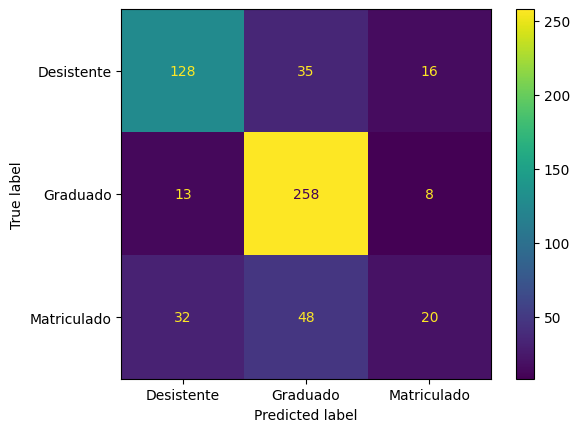

In [172]:
cm = confusion_matrix(y_val, y_pred)
viz = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
viz.plot();

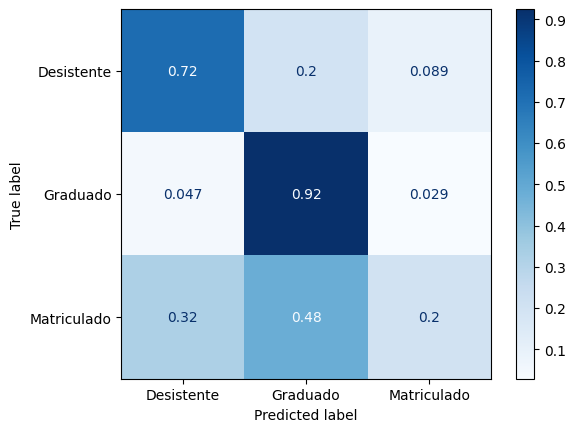

In [173]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [174]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

  Desistente       0.74      0.72      0.73       179
    Graduado       0.76      0.92      0.83       279
 Matriculado       0.45      0.20      0.28       100

    accuracy                           0.73       558
   macro avg       0.65      0.61      0.61       558
weighted avg       0.70      0.73      0.70       558



In [175]:
param_grid = {'n_estimators': [150, 300, 500], 'max_depth': [10, 20, 30], 'min_samples_split': [5, 10, 15]}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)
print("\nBest points: {:.2f}".format(grid_search.best_score_))

Melhores hiperparâmetros:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}

Melhor pontuação: 0.75


In [176]:
clf = RandomForestClassifier(random_state=42, max_depth=20, n_estimators=500, min_samples_split=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(f'Train Accuracy: {clf.score(X_train, y_train)}')
print(f'Train Accuracy: {clf.score(X_val, y_val)}')

Train Accuracy: 0.9620373299588738
Train Accuracy: 0.7275985663082437


In [178]:
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_train, y_train)
y_balanced.value_counts()

Desistente     1580
Matriculado    1580
Graduado       1580
Name: Target, dtype: int64

In [184]:
y_val.value_counts()

Graduado       279
Desistente     179
Matriculado    100
Name: Target, dtype: int64

In [185]:
sm = SMOTE(random_state=42)
X_balanced_val, y_balanced_val = sm.fit_resample(X_val, y_val)
y_balanced.value_counts()

Desistente     1580
Matriculado    1580
Graduado       1580
Name: Target, dtype: int64

In [180]:
param_grid = {'n_estimators': [150, 300, 500], 'max_depth': [10, 20, 30], 'min_samples_split': [5, 10, 15]}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_balanced, y_balanced)

print("Best Parameters:")
print(grid_search.best_params_)
print("\nBest points: {:.2f}".format(grid_search.best_score_))

Best Parameters:
{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 500}

Best points: 0.81


In [186]:
clf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators=500, min_samples_split=5)
clf.fit(X_balanced, y_balanced)
y_pred = clf.predict(X_balanced_val)
print(f'Train Accuracy: {clf.score(X_balanced, y_balanced)}')
print(f'Train Accuracy: {clf.score(X_balanced_val, y_balanced_val)}')

Train Accuracy: 0.9858649789029535
Train Accuracy: 0.7407407407407407


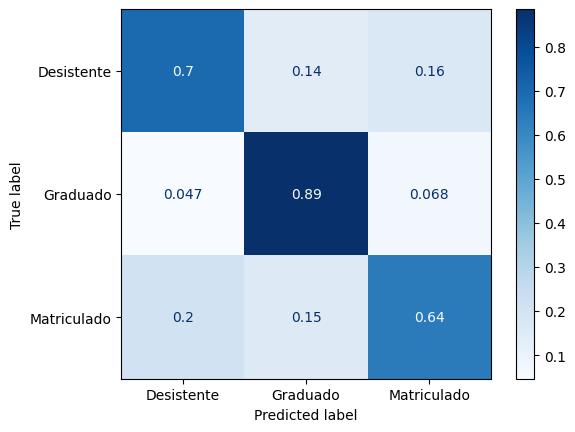

In [188]:
ConfusionMatrixDisplay.from_predictions(y_balanced_val, y_pred, normalize='true', cmap='Blues');

In [190]:
print(classification_report(y_balanced_val, y_pred))

              precision    recall  f1-score   support

  Desistente       0.73      0.70      0.71       279
    Graduado       0.75      0.89      0.81       279
 Matriculado       0.73      0.64      0.68       279

    accuracy                           0.74       837
   macro avg       0.74      0.74      0.74       837
weighted avg       0.74      0.74      0.74       837



In [200]:
# using unbalanced data
pipeline = imbpipeline([('oversample', SMOTE()), ('forest', clf)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_results['test_score']

array([0.72580645, 0.72983871, 0.73521505, 0.74327957, 0.75504711])

In [201]:
# using balanced data
pipeline = imbpipeline([('oversample', SMOTE()), ('forest', clf)])
skf_bal = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_bal = cross_validate(pipeline, X_balanced, y_balanced, cv=skf_bal, scoring='recall_weighted')
cv_results_bal['test_score']

array([0.79535865, 0.8185654 , 0.80907173, 0.83544304, 0.82067511])

In [203]:
result_mean = cv_results['test_score'].mean()
result_mean_bal = cv_results_bal['test_score'].mean()
result_mean, result_mean_bal

(0.7378373782543887, 0.8158227848101266)

In [204]:
result_std = cv_results['test_score'].std()
result_std_bal = cv_results_bal['test_score'].std()
result_std, result_std_bal

(0.010405677976058734, 0.013269354593684739)

In [205]:
print(f'Confidence Interval: {result_mean - 2 * result_std}, {result_mean + 2 * result_std}')
print(f'Confidence Interval: {result_mean_bal - 2 * result_std_bal}, {result_mean_bal + 2 * result_std_bal}')

Confidence Interval: 0.7170260223022712, 0.7586487342065061
Confidence Interval: 0.7892840756227572, 0.842361493997496
